# 线性方程和矩阵代数

```{index} single: Linear Equations and Matrix Algebra
```

## 概述

经济学和金融学中的许多问题都需要解线性方程。

在本讲座中，我们将讨论线性方程及其应用。

为了说明线性方程的重要性，我们从一个两种商品的供需模型开始。

两种商品的情况非常简单，可以手动计算解。

但我们经常需要考虑包含多种商品的市场。

在多种商品的情况下，我们面对的是大型线性方程组，有许多方程和未知数。

为了处理这样的系统，我们需要两样东西：

* 矩阵代数（以及如何使用它的知识）以及
* 将矩阵代数应用于感兴趣问题的计算机代码。

本讲座涵盖了这些步骤。

我们将使用以下的库：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 两种商品的例子

在本节中，我们将讨论一个简单的两种商品例子，并通过以下两种方法解决：

1. 纸笔计算
2. 矩阵代数

正如我们将看到的，第二种方法更具普遍性。

### 纸笔计算方法

假设我们有两种相关的商品，比如：

* 丙烷和乙醇，或
* 大米和小麦等。

为了简化问题，我们将它们标记为商品0和商品1。

每种商品的需求取决于两种商品的价格：

```{math}
:label: two_eq_demand

\begin{aligned}
    q_0^d = 100 - 10 p_0 - 5 p_1 \\
    q_1^d = 50 - p_0 - 10 p_1
\end{aligned}
```

（我们假设当任一商品的价格上涨时需求会下降，但其他情况也是可能的。）
让我们假设供给由以下方程给出：


```{math}
:label: two_eq_supply

\begin{aligned}
    q_0^s = 10 p_0 + 5 p_1 \\
    q_1^s = 5 p_0 + 10 p_1
\end{aligned}
```

当供给等于需求时（$q_0^s = q_0^d$ 和 $q_1^s = q_1^d$），市场达到均衡。

这产生了以下线性系统：

```{math}
:label: two_equilibrium

\begin{aligned}
    100 - 10 p_0 - 5 p_1 = 10 p_0 + 5 p_1 \\
    50 - p_0 - 10 p_1 = 5 p_0 + 10 p_1
\end{aligned}
```

我们可以用纸笔计算得到：

$$
    p_0 = 4.41 \quad \text{和} \quad p_1 = 1.18.
$$    

将这些结果代入{eq}`two_eq_demand`或{eq}`two_eq_supply`中，可得均衡数量：

$$
    q_0 = 50 \quad \text{和} \quad q_1 = 33.82.
$$

### 展望未来

在两种商品的情况下，纸笔计算方法很容易。

但如果有很多种商品呢？

对于这样的问题，我们需要矩阵代数。

在用矩阵代数解决问题之前，让我们先回顾一下向量和矩阵的基础知识，包括理论和计算。


## {index}`向量 <single: Vectors>`

 ```{index} single: Linear Algebra; Vectors
 ```

一个长度为$n$的**向量**就是一个由$n$个数字组成的序列（或数组，或元组），我们将其写作$x = (x_1, \ldots, x_n)$或$x = \begin{bmatrix}x_1, \ldots, x_n\end{bmatrix}$。

我们可以将这些序列横向或纵向写出。

但当我们使用矩阵运算时，我们默认假设向量是列向量。

所有$n$维向量的集合用$\mathbb R^n$表示。

```{prf:example}
:label: le_ex_dim

* $\mathbb R^2$是平面 --- 即所有$(x_1, x_2)$对的集合。
* $\mathbb R^3$是三维空间 --- 即所有$(x_1, x_2, x_3)$向量的集合。
向量通常在视觉上表示为从原点到某点的箭头。
```

这里是一个可视化示例。

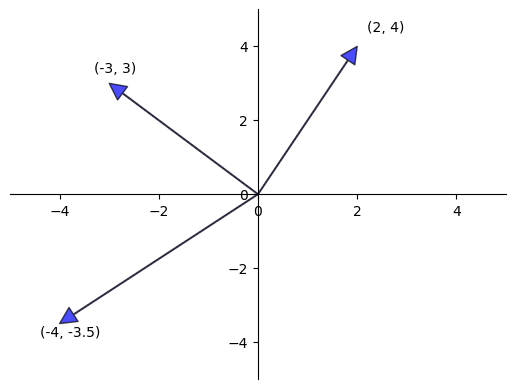

In [2]:
fig, ax = plt.subplots()
# 通过原点建立坐标轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))

vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

### 向量运算

```{index} single: Vectors; Operations
```

有时我们需要修改向量。

对向量最常见的两种运算是加法和标量乘法，我们现在来描述这两种运算。

当我们对两个向量进行加法运算时，我们是逐元素相加。

```{prf:example}
:label: le_ex_add

$$
\begin{bmatrix}
    4 \\
    -2 
\end{bmatrix}
+
\begin{bmatrix}
    3 \\
    3 
\end{bmatrix}
=
\begin{bmatrix}
    4 & + & 3 \\
    -2 & + & 3 
\end{bmatrix}
=
\begin{bmatrix}
    7 \\
    1
\end{bmatrix}.
$$
```

一般来说，

$$
x + y =
\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix} +
\begin{bmatrix}
     y_1 \\
     y_2 \\
    \vdots \\
     y_n
\end{bmatrix} :=
\begin{bmatrix}
    x_1 + y_1 \\
    x_2 + y_2 \\
    \vdots \\
    x_n + y_n
\end{bmatrix}.
$$

我们可以在$\mathbb{R}^2$中将向量加法可视化如下。

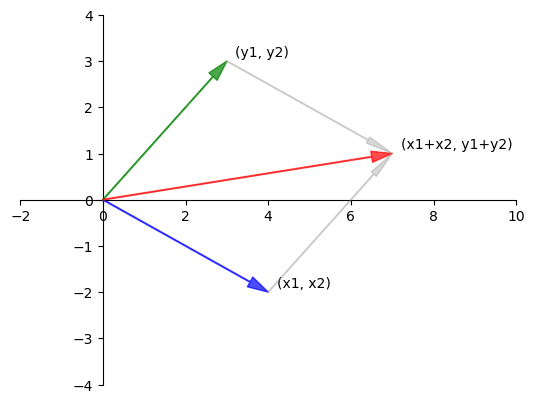

In [3]:
fig, ax = plt.subplots()
# 通过原点建立坐标轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 10), ylim=(-4, 4))
# ax.grid()
vecs = ((4, -2), (3, 3), (7, 1))
tags = ('(x1, x2)', '(y1, y2)', '(x1+x2, y1+y2)')
colors = ('blue', 'green', 'red')
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(color=colors[i],
                shrink=0,
                alpha=0.7,
                width=0.5,
                headwidth=8,
                headlength=15))
    ax.text(v[0] + 0.2, v[1] + 0.1, tags[i])

for i, v in enumerate(vecs):
    ax.annotate('', xy=(7, 1), xytext=v,
                arrowprops=dict(color='gray',
                shrink=0,
                alpha=0.3,
                width=0.5,
                headwidth=5,
                headlength=20))
plt.show()

标量乘法是一种将向量 $x$ 与一个标量进行元素级别相乘的运算。

```{prf:example}
:label: le_ex_mul

$$
-2
\begin{bmatrix}
    3 \\
    -7 
\end{bmatrix}
=
\begin{bmatrix}
    -2 & \times & 3 \\
    -2 & \times & -7
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\
    14
\end{bmatrix}.
$$
```

更一般地，它取一个数 $\gamma$ 和一个向量 $x$，得到

$$
\gamma x :=
\begin{bmatrix}
    \gamma x_1 \\
    \gamma x_2 \\
    \vdots \\
    \gamma x_n
\end{bmatrix}.
$$

标量乘法在下图中进行了说明。

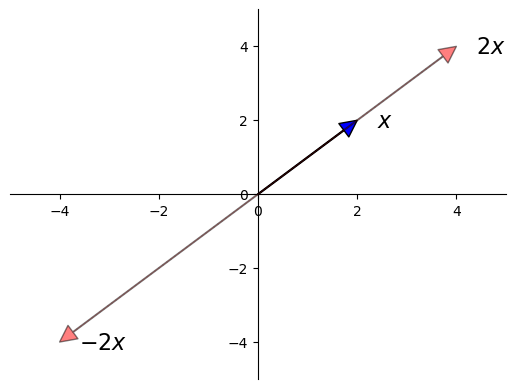

In [4]:
fig, ax = plt.subplots()
# 通过原点建立坐标轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')

scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

在Python中，向量可以用列表或元组表示，
例如 `x = [2, 4, 6]` 或 `x = (2, 4, 6]`。

然而，更常见的是用
[NumPy数组](https://python-programming.quantecon.org/numpy.html#numpy-arrays)来表示向量。

NumPy数组的一个优点是标量乘法和加法具有非常自然的语法。

In [5]:
x = np.ones(3)            # 三个元素为一的向量
y = np.array((2, 4, 6))   # 将 (2, 4, 6) 转换为 NumPy 数组
x + y                     # 每个元素相加

array([3., 5., 7.])

In [6]:
4 * x                     # 标量乘法

array([4., 4., 4.])

### 内积和范数

```{index} single: Vectors; Inner Product
```

```{index} single: Vectors; Norm
```

向量 $x,y \in \mathbb R^n$ 的**内积**定义为

$$
x^\top y = 
\begin{bmatrix}
    \color{red}{x_1} & \color{blue}{x_2} & \cdots & x_n
\end{bmatrix}
\begin{bmatrix}
    \color{red}{y_1} \\
    \color{blue}{y_2} \\
    \vdots \\
    y_n
\end{bmatrix}
= {\color{red}{x_1 y_1}} + {\color{blue}{x_2 y_2}} + \cdots + x_n y_n
:= \sum_{i=1}^n x_i y_i.
$$

向量 $x$ 的**范数**表示其"长度"（即，其与零向量的距离），定义为

$$
    \| x \| := \sqrt{x^\top x} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}.
$$

表达式 $\| x - y\|$ 可以被理解为 $x$ 和 $y$ 之间的"距离"。

内积和范数可以按以下方式计算

In [7]:
np.sum(x*y)      # x和y的内积

12.0

In [8]:
x @ y            # 另外一种计算内积的办法

12.0

In [9]:
np.sqrt(np.sum(x**2))  # x的范数，方法一

1.7320508075688772

In [10]:
np.linalg.norm(x)      # x的范数，方法二

1.7320508075688772

## 矩阵运算

```{index} single: Matrix; Operations
```

当我们讨论线性价格系统时，我们提到了使用矩阵代数。

矩阵代数类似于数字代数。

让我们回顾一些细节。

### 加法和标量乘法

就像向量一样，我们可以对矩阵进行加法、减法和标量乘法。

标量乘法和加法是向量情况的推广：

```{prf:example}
:label: le_ex_asm

$$
3
\begin{bmatrix}
    2 & -13 \\
    0 & 5
\end{bmatrix}
=
\begin{bmatrix}
    6 & -39 \\
    0 & 15
\end{bmatrix}.
$$
```

一般来说，对于任意数 $\gamma$ 和任意矩阵 $A$，

$$
\gamma A =
\gamma
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk}
\end{bmatrix}.
$$

```{prf:example}
:label: le_ex_ma

考虑这个矩阵加法的例子，
$$
\begin{bmatrix}
    1 & 5 \\
    7 & 3 \\
\end{bmatrix}
+
\begin{bmatrix}
    12 & -1 \\
    0 & 9
\end{bmatrix}
=
\begin{bmatrix}
    13 & 4 \\
    7 & 12
\end{bmatrix}.
$$
```

一般来说，

$$
A + B =
\begin{bmatrix}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk}
\end{bmatrix} +
\begin{bmatrix}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk}
\end{bmatrix}.
$$

在后一种情况下，矩阵必须具有相同的形状才能使定义有意义。

### 矩阵乘法

我们还有一个*相乘*两个矩阵的约定。

矩阵乘法的规则推广了上面讨论的内积的概念。

如果 $A$ 和 $B$ 是两个矩阵，那么它们的乘积 $A B$ 的形成是通过取 $A$ 的第 $i$ 行和 $B$ 的第 $j$ 列的内积作为其第 $i,j$ 个元素。

如果 $A$ 是 $n \times k$ 的，$B$ 是 $j \times m$ 的，那么要相乘 $A$ 和 $B$，我们需要 $k = j$，而得到的矩阵 $A B$ 是 $n \times m$ 的。

```{prf:example}
:label: le_ex_2dmul

这里是一个 $2 \times 2$ 矩阵乘以 $2 \times 1$ 向量的例子。

$$
Ax =
\begin{bmatrix}
    \color{red}{a_{11}} & \color{red}{a_{12}} \\
    a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
    \color{red}{x_1} \\
    \color{red}{x_2}
\end{bmatrix}
=
\begin{bmatrix}
    \color{red}{a_{11}x_1 + a_{12}x_2} \\
    a_{21}x_1 + a_{22}x_2
\end{bmatrix}
$$
```

作为一个重要的特殊情况，考虑将 $n \times k$ 矩阵 $A$ 和 $k \times 1$ 列向量 $x$ 相乘。

根据前面的规则，这给我们一个 $n \times 1$ 列向量。

```{math}
:label: la_atx

A x =
{\begin{bmatrix}
    a_{11} & a_{12} &  \cdots & a_{1k} \\
    \vdots & \vdots & & \vdots \\
    \color{red}{a_{i1}} & \color{red}{a_{i2}} & \color{red}{\cdots} & \color{red}{a_{i}k} \\
    \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}}_{n \times k}
{\begin{bmatrix}
    \color{red}{x_{1}}  \\
    \color{red}{x_{2}}  \\
    \color{red}{\vdots} \\
    \color{red}{\vdots}  \\
    \color{red}{x_{k}}
\end{bmatrix}}_{k \times 1} :=
{\begin{bmatrix}
    a_{11} x_1 + a_{22} x_2 + \cdots + a_{1k} x_k \\
    \vdots \\
    \color{red}{a_{i1} x_1 + a_{i2} x_2 + \cdots + a_{ik} x_k} \\
    \vdots \\
    a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nk} x_k
\end{bmatrix}}_{n \times 1}
```

下面展示了两个矩阵的乘法。

$$
AB =
\begin{bmatrix}
    a_{11} & a_{12} \\
    \color{red}{a_{21}} & \color{red}{a_{22}} \\
\end{bmatrix}
\begin{bmatrix}
    b_{11} & \color{red}{b_{12}} \\
    b_{21} & \color{red}{b_{22}} \\
\end{bmatrix} :=
\begin{bmatrix}
    a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
    a_{21}b_{11} + a_{22}b_{21} & \color{red}{a_{21}b_{12} + a_{22}b_{22}}
\end{bmatrix}
$$

有许多教程可以帮助你进一步可视化这个操作，例如

* [这个教程](http://www.mathsisfun.com/algebra/matrix-multiplying.html)，或者
* [维基百科页面](https://en.wikipedia.org/wiki/Matrix_multiplication)上的讨论。

```{note}
与数字乘积不同，$A B$ 和 $B A$ 通常不是同一件事。
```

一个重要的特殊情况是[单位矩阵](https://en.wikipedia.org/wiki/Identity_matrix)，它在主对角线上有 1，其他地方都是 0：

$$
    I = 
    \begin{bmatrix}
        1 & \cdots & 0 \\
        \vdots & \ddots & \vdots \\
        0 &  \cdots & 1
    \end{bmatrix}
$$

验证以下内容是一个有用的练习：

* 如果 $A$ 是 $n \times k$ 矩阵，$I$ 是 $k \times k$ 单位矩阵，那么 $AI = A$，并且
* 如果 $I$ 是 $n \times n$ 单位矩阵，那么 $IA = A$。


###  NumPy中的矩阵

```{index} single: Matrix; Numpy
```
NumPy 数组也被用作矩阵，并且对所有标准矩阵运算都有快速、高效的函数和方法。

你可以通过以下方式从元组的元组（或列表的列表）手动创建它们

In [11]:
A = ((1, 2),
     (3, 4))

type(A)

tuple

In [12]:
A = np.array(A)

type(A)

numpy.ndarray

In [13]:
A.shape

(2, 2)

`shape` 属性是一个给出行数和列数的元组 --- 
更多讨论请参见[这里](https://python-programming.quantecon.org/numpy.html#shape-and-dimension)。

要获得 `A` 的转置，使用 `A.transpose()` 或更简单地使用 `A.T`。

有许多方便的函数用于创建常见矩阵（零矩阵、单位矩阵等） --- 请参见[这里](https://python-programming.quantecon.org/numpy.html#creating-arrays)。

由于默认情况下操作是按元素执行的，标量乘法和加法具有非常自然的语法。

In [14]:
A = np.identity(3)    # 3 x 3 单位矩阵
B = np.ones((3, 3))   # 3 x 3 元素为一的矩阵
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [15]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

我们用 `@` 来进行矩阵乘法。


```{note}
其中 `A @ B` 是矩阵乘法, 但是 `A * B`是每个元素之间的运算。
```

### 矩阵形式的两种商品模型

我们现在可以重新审视两种商品模型，并通过矩阵代数数值求解 {eq}`two_equilibrium` 方程。

这涉及一些额外的步骤，但这种方法广泛适用 --- 正如我们在包含更多商品时将看到的那样。
首先，我们将 {eq}`two_eq_demand` 重写为

```{math}
:label: two_eq_demand_mat

    q^d = D p + h
    \quad \text{where} \quad
    q^d = 
    \begin{bmatrix}
        q_0^d \\
        q_1^d
    \end{bmatrix}
    \quad
    D = 
    \begin{bmatrix}
         -10 & - 5  \\
         - 1  & - 10  
    \end{bmatrix}
    \quad \text{and} \quad
    h =
    \begin{bmatrix}
        100 \\
        50
    \end{bmatrix}.
```

回想一下，$p \in \mathbb{R}^{2}$ 是两种商品的价格。

（请检查 $q^d = D p + h$ 是否表示与 {eq}`two_eq_demand` 相同的方程。）

我们将 {eq}`two_eq_supply` 重写为

```{math}
:label: two_eq_supply_mat

    q^s = C p 
    \quad \text{where} \quad
    q^s = 
    \begin{bmatrix}
        q_0^s \\
        q_1^s
    \end{bmatrix}
    \quad \text{and} \quad
    C = 
    \begin{bmatrix}
         10 & 5  \\
         5 & 10  
    \end{bmatrix}.
```

现在供给和需求的相等可以表示为 $q^s = q^d$，或

$$
    C p = D p + h.
$$

我们可以重新排列这些项得到

$$
    (C - D) p = h.
$$

如果所有项都是数字，我们可以求解价格为 $p = h / (C-D)$。
矩阵代数允许我们做类似的事情：我们可以使用 $C - D$ 的逆矩阵来求解均衡价格：

```{math}
:label: two_matrix

p = (C - D)^{-1} h.
```

在我们实施解决方案之前，让我们考虑一个更一般的设置。

### 更多商品

考虑有更多商品的需求系统是很自然的。

例如，即使在能源商品中也有许多不同的商品，
包括原油、汽油、煤炭、天然气、乙醇和铀。

这些商品的价格是相关的，所以一起研究它们是有意义的。

对于大型系统，纸笔方法会变得非常耗时。

但幸运的是，上面描述的矩阵方法基本上保持不变。

一般来说，我们可以将需求方程写为 $q^d = Dp + h$，其中

* $q^d$ 是一个 $n \times 1$ 的向量，表示 $n$ 种不同商品的需求量。
* $D$ 是一个 $n \times n$ 的"系数"矩阵。
* $h$ 是一个 $n \times 1$ 的常数值向量。

类似地，我们可以将供给方程写为 $q^s = Cp + e$，其中

* $q^s$ 是一个 $n \times 1$ 的向量，表示相同商品的供给量。
* $C$ 是一个 $n \times n$ 的"系数"矩阵。
* $e$ 是一个 $n \times 1$ 的常数值向量。

为了找到均衡，我们求解 $Dp + h = Cp + e$，或

```{math}
:label: n_eq_sys_la

    (D- C)p = e - h.
```

那么，n 种不同商品的价格向量是

$$ 
    p = (D- C)^{-1}(e - h).
$$

### 一般线性系统

上述问题的一个更一般版本看起来如下。

```{math}
:label: la_se

\begin{matrix}
    a_{11} x_1 & + & a_{12} x_2 & + & \cdots & + & a_{1n} x_n & = & b_1 \\
    \vdots & & \vdots & & & & \vdots & & \vdots \\
    a_{n1} x_1 & + & a_{n2} x_2 & + & \cdots & + & a_{nn} x_n & = & b_n
\end{matrix}
```

这里的目标是解出"未知数" $x_1, \ldots, x_n$。

我们给定系数 $a_{11}, \ldots, a_{nn}$ 和常数 $b_1, \ldots, b_n$。

注意，我们处理的是未知数数量等于方程数量的情况。

这是我们最有可能找到明确定义解的情况。

（其他情况被称为[超定](https://en.wikipedia.org/wiki/Overdetermined_system)和[欠定](https://en.wikipedia.org/wiki/Underdetermined_system)方程组 --- 我们将在后续讲座中讨论这些情况。）

用矩阵形式表示，方程组 {eq}`la_se` 变为

```{math}
:label: la_gf

    A x = b
    \quad \text{where} \quad
    A = 
    \begin{bmatrix}
        a_{11} &  \cdots & a_{1n} \\
        \vdots & \vdots  & \vdots \\
        a_{n1} &  \cdots & a_{nn}
    \end{bmatrix}
    \quad \text{and} \quad
    b =
    \begin{bmatrix}
        b_1 \\
        \vdots \\
        b_n
    \end{bmatrix}.
```
例如，{eq}`n_eq_sys_la` 具有这种形式，其中

$$
    A = D - C,
    \quad
    b = e - h
    \quad \text{和} \quad
    x = p.
$$

当考虑诸如 {eq}`la_gf` 这样的问题时，我们至少需要问以下一些问题：

* 解是否真的存在？
* 如果解存在，我们应该如何计算它？

## 解方程组

```{index} single: Matrix; Solving Systems of Equations
```

再次回顾方程组 {eq}`la_se`，我们在此重新写为

```{math}
:label: la_se2

    A x = b
```

我们面临的问题是找到一个向量 $x \in \mathbb R^n$，使其解决 {eq}`la_se2` ，其中 $b$ 和 $A$ 是给定的。

我们可能并不总能找到一个唯一的向量 $x$ 来解决 {eq}`la_se2` 。

我们在下面举例说明两种这样的情况。

### 无解

考虑由以下给出的方程组：

$$
\begin{aligned}
    x + 3y &= 3 \\
    2x + 6y &= -8.
\end{aligned}
$$

可以手动验证这个系统没有可能的解。

为了说明为什么会出现这种情况，让我们绘制这两条直线。

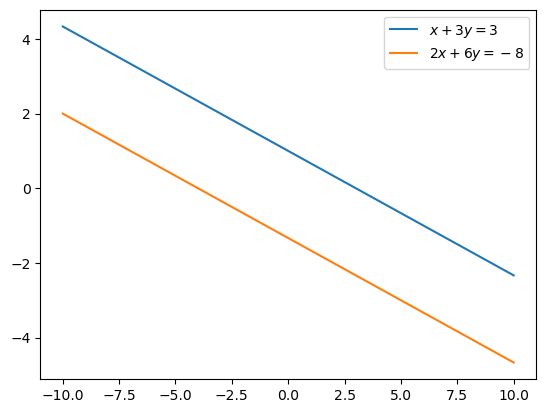

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-10, 10)
plt.plot(x, (3-x)/3, label=f'$x + 3y = 3$')
plt.plot(x, (-8-2*x)/6, label=f'$2x + 6y = -8$')
plt.legend()
plt.show()

显然，这些是平行线，因此我们永远无法找到一个点 $x \in \mathbb{R}^2$ 使得这些线相交。

因此，这个系统没有可能的解。

我们可以将这个系统用矩阵形式重写为

```{math}
:label: no_soln

    A x = b
    \quad \text{where} \quad
    A =
    \begin{bmatrix}
        1 & 3 \\
        2 & 6 
    \end{bmatrix}
    \quad \text{and} \quad
    b =
    \begin{bmatrix}
        3 \\
        -8
    \end{bmatrix}.
```

可以注意到，矩阵 $A$ 的第 $2$ 行 $(2, 6)$ 只是第 $1$ 行 $(1, 3)$ 的标量倍数。

在这种情况下，矩阵 $A$ 的行被称为**线性相关的。**

```{note}
高级读者可以在[这里](https://python.quantecon.org/linear_algebra.html#linear-independence)找到关于线性相关和线性无关的详细解释。

但在接下来的内容中不需要这些细节。

```


### 多解

现在考虑，

$$
\begin{aligned}
    x - 2y &= -4 \\
    -2x + 4y &= 8.
\end{aligned}
$$

任何满足 $x = 2y - 4$ 的向量 $v = (x,y)$ 都将解决上述系统。

由于我们可以找到无限多个这样的向量，这个系统有无穷多个解。

这是因为对应矩阵的行

```{math}
:label: many_solns

    A =
    \begin{bmatrix}
        1 & -2 \\
        -2 & 4
    \end{bmatrix}.
```

是线性相关的 --- 你能看出为什么吗？

我们现在对 {eq}`la_se2` 中的 $A$ 施加条件，以排除这些问题。

### 非奇异矩阵

对于每个方阵，我们都可以指定一个唯一的数，称为[行列式](https://en.wikipedia.org/wiki/Determinant)。

对于 $2 \times 2$ 矩阵，行列式由以下公式给出：

$$
\begin{bmatrix}
    \color{red}{a} & \color{blue}{b} \\
    \color{blue}{c} & \color{red}{d}
\end{bmatrix}
=
{\color{red}{ad}} - {\color{blue}{bc}}.
$$

如果 $A$ 的行列式不为零，我们就说 $A$ 是*非奇异的*。

当且仅当 $A$ 的行和列是线性无关的，方阵 $A$ 才是非奇异的。

关于矩阵逆的更详细解释可以在[这里](https://www.mathsisfun.com/algebra/matrix-inverse.html)找到。

你可以自己检查 {eq}`no_soln` 和 {eq}`many_solns` 中具有线性相关行的矩阵是奇异矩阵。

这为我们提供了一个有用的单数值概括，用来判断一个方阵是否可逆。

特别地，方阵 $A$ 具有非零行列式，当且仅当它具有*逆矩阵* $A^{-1}$，满足 $A A^{-1} = A^{-1} A = I$。

因此，如果我们用 $A^{-1}$ 左乘 $Ax = b$ 的两边，我们得到

```{math}
:label: la_se_inv

    x = A^{-1} b.
```

这是对 $Ax = b$ 的解答 --- 这就是我们要寻找的解。

### 使用NumPy求解线性方程

```{index} single: Linear Algebra; SciPy
```

在两个好的例子中，我们得到了矩阵方程：

$$
p = (C-D)^{-1} h.
$$

其中 $C$、$D$ 和 $h$ 由 {eq}`two_eq_demand_mat` 和 {eq}`two_eq_supply_mat` 给出。

这个方程类似于 {eq}`la_se_inv`，其中 $A = (C-D)^{-1}$，$b = h$，且 $x = p$。

我们现在可以使用NumPy的`linalg`子模块求解均衡价格。

所有这些程序都是经过时间检验和高度优化的FORTRAN代码的Python前端。

In [17]:
C = ((10, 5),      # 矩阵 C
     (5, 10))

Now we change this to a NumPy array.

In [18]:
C = np.array(C)

In [19]:
D = ((-10, -5),     # 矩阵 D
     (-1, -10))
D = np.array(D)

In [20]:
h = np.array((100, 50))   # 向量 h
h.shape = 2,1             # 将h转换为列向量

In [21]:
from numpy.linalg import det, inv
A = C - D
#检查A是否为奇异矩阵（行列式是否为零），是否可逆
det(A)

340.0000000000001

In [22]:
A_inv = inv(A)  #计算逆矩阵
A_inv

array([[ 0.05882353, -0.02941176],
       [-0.01764706,  0.05882353]])

In [23]:
p = A_inv @ h  #均衡价格
p

array([[4.41176471],
       [1.17647059]])

In [24]:
q = C @ p  # 均衡数量
q

array([[50.        ],
       [33.82352941]])

注意，我们得到的解与纸笔计算的情况相同。

我们还可以使用 `solve(A, h)` 来求解 $p$，如下所示。

In [25]:
from numpy.linalg import solve
p = solve(A, h)  # 均衡价格
p

array([[4.41176471],
       [1.17647059]])

In [26]:
q = C @ p  # 均衡数量
q

array([[50.        ],
       [33.82352941]])

观察我们如何通过 `inv(A) @ y` 或使用 `solve(A, y)` 来求解 $x = A^{-1} y$。

后一种方法使用了一种不同的算法，在数值上更加稳定，因此应该是默认选项。


## 练习
```{exercise-start}
:label: lin_eqs_ex1
```
让我们考虑一个有3种商品的市场 - 商品0、商品1和商品2。

每种商品的需求取决于其他两种商品的价格，由以下公式给出：

$$
\begin{aligned}
    q_0^d & = 90 - 15p_0 + 5p_1 + 5p_2 \\
    q_1^d & = 60 + 5p_0 - 10p_1 + 10p_2 \\
    q_2^d & = 50 + 5p_0 + 5p_1 - 5p_2
\end{aligned}
$$

（这里，当自身价格上涨时需求下降，但当其他商品价格上涨时需求增加。）

每种商品的供给由以下公式给出：

$$
\begin{aligned}
    q_0^s & = -10 + 20p_0 \\
    q_1^s & = -15 + 15p_1 \\
    q_2^s & =  -5 + 10p_2
\end{aligned}
$$

当供给等于需求时，市场达到均衡，即 $q_0^d = q_0^s$，$q_1^d = q_1^s$ 和 $q_2^d = q_2^s$。

1. 将市场设置为线性方程组。
2. 使用矩阵代数求解均衡价格。分别使用 `numpy.linalg.solve` 和 `inv(A)` 方法来做这个。比较这两种解法。

```{exercise-end}
```
```{solution-start} lin_eqs_ex1
:class: dropdown
```
生成的系统将是：

$$
\begin{aligned}
    35p_0 - 5p_1 - 5p_2 = 100 \\
    -5p_0 + 25p_1 - 10p_2 = 75 \\
    -5p_0 - 5p_1 + 15p_2 = 55
\end{aligned}
$$

用矩阵形式，我们将其表示为：

$$
Ap = b
\quad \text{其中} \quad
A =
\begin{bmatrix}
    35 & -5 & -5 \\
    -5 & 25 & -10 \\
    -5 & -5 & 15
\end{bmatrix}
, \quad p =
\begin{bmatrix}
    p_0 \\
    p_1 \\
    p_2
\end{bmatrix}
\quad \text{且} \quad
b = 
\begin{bmatrix}
    100 \\
    75 \\
    55
\end{bmatrix}
$$

In [27]:
import numpy as np
from numpy.linalg import det

A = np.array([[35, -5, -5],  # 矩阵 A
              [-5, 25, -10],
              [-5, -5, 15]])

b = np.array((100, 75, 55))  # 列向量 b
b.shape = (3, 1)

det(A)  # 检查A是否为奇异矩阵

9999.99999999999

In [28]:
# 使用inverse
from numpy.linalg import det

A_inv = inv(A)

p = A_inv @ b
p

array([[4.9625],
       [7.0625],
       [7.675 ]])

In [29]:
# 使用 numpy.linalg.solve
from numpy.linalg import solve
p = solve(A, b)
p

array([[4.9625],
       [7.0625],
       [7.675 ]])

答案为：

$$
p_0 = 4.6925, \; p_1 = 7.0625 \;\; \text{and} \;\; p_2 = 7.675
$$

```{solution-end}
```

```{exercise-start}
:label: lin_eqs_ex2
```
在讲座的早些时候，我们讨论了$Ax = b$这个方程组没有解的情况。

在这种情况下，$Ax = b$被称为*不相容*方程组。

面对不相容系统时，我们尝试找到最佳的"近似"解。

有多种方法可以做到这一点，其中一种是**最小二乘法**。

假设我们有一个不相容系统

```{math}
:label: inconsistent

    Ax = b
```

其中$A$是一个$m \times n$矩阵，$b$是一个$m \times 1$列向量。

对于{eq}`inconsistent`，**最小二乘解**是一个$n \times 1$列向量$\hat{x}$，使得对于所有其他向量$x \in \mathbb{R}^n$，$A\hat{x}$到$b$的距离小于$Ax$到$b$的距离。

即，

$$
    \|A\hat{x} - b\| \leq \|Ax - b\| 
$$

可以证明，对于方程组$Ax = b$，最小二乘解$\hat{x}$是

```{math}
:label: least_squares

    \hat{x} =  (A^T A)^{-1} A^T b
```

现在考虑一种商品的线性需求曲线的一般方程：

$$
    p = m - nq
$$

其中$p$是商品的价格，$q$是需求量。

假设我们正试图*估计*$m$和$n$的值。

我们通过重复观察价格和数量（例如，每个月）来做到这一点，然后选择$m$和$n$来拟合$p$和$q$之间的关系。

我们有以下观察结果：

| 价格 | 需求量 |
|:-----:|:-----------------:|
|   1   |         9         |
|   3   |         7         |
|   8   |         3         |

要求需求曲线$p = m - nq$通过所有这些点，得到以下三个方程：

$$
\begin{aligned}
    1 = m - 9n \\
    3 = m - 7n \\
    8 = m - 3n
\end{aligned}
$$

因此，我们得到一个方程组$Ax = b$，其中$A = \begin{bmatrix} 1 & -9 \\ 1 & -7 \\ 1 & -3 \end{bmatrix}$，
$x = \begin{bmatrix} m \\ n \end{bmatrix}$，$b = \begin{bmatrix} 1 \\ 3 \\ 8 \end{bmatrix}$。
可以验证这个系统没有解。

（问题在于我们有三个方程但只有两个未知数。）

因此，我们将尝试找到$x$的最佳近似解。

1. 使用{eq}`least_squares`和矩阵代数找到最小二乘解$\hat{x}$。

2. 使用`numpy.linalg.lstsq`找到最小二乘解，并比较结果。


```{exercise-end}
```

```{solution-start} lin_eqs_ex2
:class: dropdown
```

In [30]:
import numpy as np
from numpy.linalg import inv

In [31]:
# 运用线性代数
A = np.array([[1, -9],  # 矩阵 A
              [1, -7],
              [1, -3]])

A_T = np.transpose(A)  # 矩阵A的转置

b = np.array((1, 3, 8))  # 列向量 b
b.shape = (3, 1)

x = inv(A_T @ A) @ A_T @ b
x

array([[11.46428571],
       [ 1.17857143]])

In [32]:
# 使用 numpy.linalg.lstsq
x, res, _, _ = np.linalg.lstsq(A, b, rcond=None)

In [33]:
print(f"x\u0302 = {x}")
print(f"\u2016Ax\u0302 - b\u2016\u00B2 = {res[0]}")

x̂ = [[11.46428571]
 [ 1.17857143]]
‖Ax̂ - b‖² = 0.07142857142857066


这是一个可视化图，展示了最小二乘法如何近似一组点之间连线的方程。

我们也可以将此描述为在一组点之间"拟合"一条直线。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

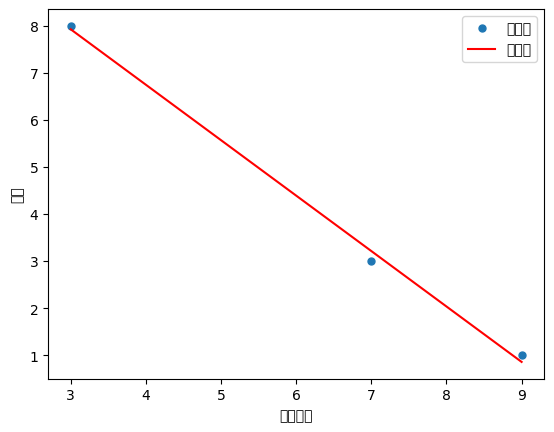

In [34]:
fig, ax = plt.subplots()
p = np.array((1, 3, 8))
q = np.array((9, 7, 3))

a, b = x

ax.plot(q, p, 'o', label='观测点', markersize=5)
ax.plot(q, a - b*q, 'r', label='拟合线')
plt.xlabel('需求数量')
plt.ylabel('价格')
plt.legend()
plt.show()

```{solution-end}
```

### 延伸阅读

`numpy.linalg` 子模块的文档可以在[这里](https://numpy.org/devdocs/reference/routines.linalg.html)找到。

线性代数的更高级主题可以在[这里](https://python.quantecon.org/linear_algebra.html#id5)找到。